In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import seaborn as sns
import random

In [83]:
def read_content(filename):
    """
    Reads(R mode) and returns the content of the input filename in the form of string.
    """
    content = open(filename,"r").read()
    return content.lower()
def clean_text(content):
    """
    Cleans and returns the content to remove symbols and words like an,the,a,be.
    Source for removing tags https://tutorialedge.net/python/removing-html-from-string/
    First the regex removes words like a, an , the, following which it removes the html tags,symbols, 
    """
    content = re.compile(r'\b(an|the|a|be|to|on|for|of|with|and|in|we|this|are|as|have)\b',).sub('', content)
    content = re.compile(r'<[^>]+>|[`,"\\/\(\)\[\]\n\.#\*]',).sub('', content)
    return content

### 1.1.1 Word Count Program: In this task your are required to use the provided text file and write a program that will count the number of occurances of unique words. The program should ignore words like 'the', 'a','an','be'

<BarContainer object of 10 artists>

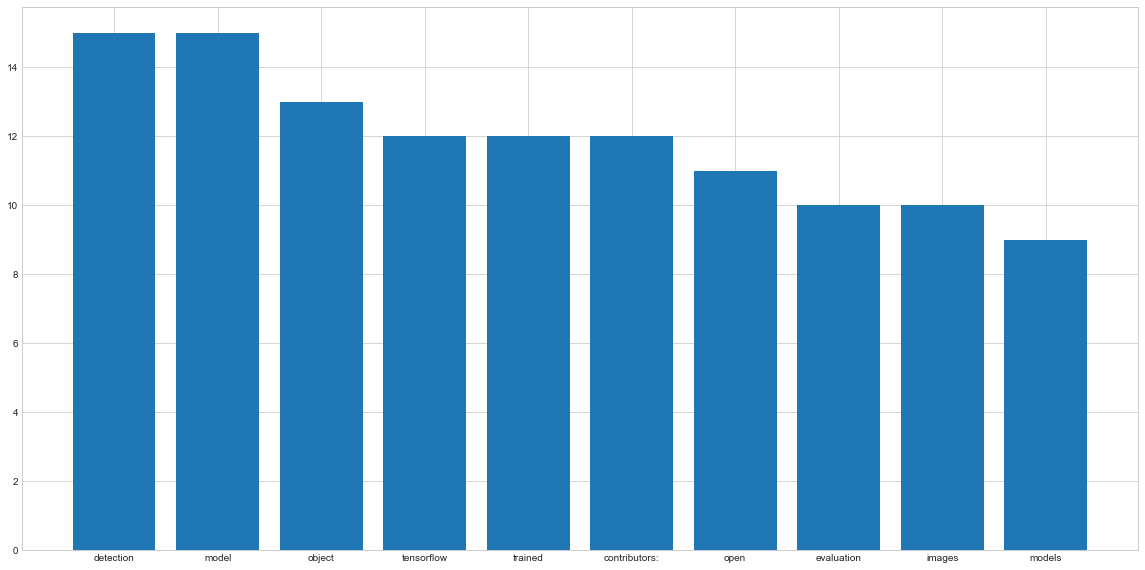

In [84]:
#read the content of the file
content = read_content("README.md.txt")
#removes unnecessary text, symbols and numbers
clean_content = clean_text(content) 
#split the content to get an array of words separted by space.
words_array = clean_content.split()
#Counter creates a dict of words with their count
c = Counter(words_array)  
#print(f"The word is {c}")
#returns a list of 10 most common word in text corpus with the occurence 
most_common_10 = c.most_common(10)
key, value = [], []
#fetch word:occurence as dictionary from list 
for k,v in most_common_10:
    key.append(k)
    value.append(v)
#plot the histogram
plt.figure(figsize=(20,10))
plt.bar(key, value)

### Using numpy you are required to use numpy for operation on matrices. Create a matrix A of dimensions n x m, where n = 100 and m = 20. Initialize Matrix A. Create a vector v of dimension m x 1. Initialize the matrix with a random values and vector with normal distribution using mean = 2 and SD = 0:01. Perform following operation on them 
- #### Iterative multiply (element-wise) each row of matrix A with vector v and sum the result of each iteration in another vector c

- #### Find mean and standard deviation of the new vector c

- #### Plot histogram of vector c using 5 bins

The mean of the vector V is 19.97851782371043
The standard deviation  of the vector V is 2.4599923715111687


<a list of 5 Patch objects>

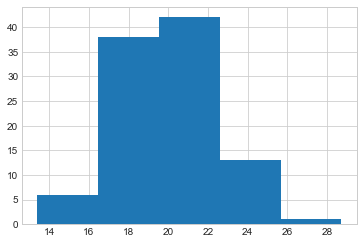

In [82]:
#intialize a random matrix with 100*20 values
A = np.random.rand(100,20)
#intialize a random vector with 20*1 values
v = np.random.normal(2,0.01 ,(20,1))
#create a numpy array 
c = np.array([])
#iterate over rows and then through columns
for row in range(100):
    row_sum = 0
    for col in range(20):
        row_sum=row_sum+np.multiply(A[row][col],v[col])
    c = np.append(c,row_sum)
#show mean and Standard Deviation
print(f"The mean of the vector V is {c.mean()}")
print(f"The standard deviation  of the vector V is {c.std()}")
#Plot a histogram with 5 bins
plt.hist(c,bins=5)[2]

## Exercise 2


### Generate 3 sets of simple data. i.e. a matrix A with dimensions 100x2. Initialize it with normal distribution mean = 2 and SD = [0.01, 0.1,1]

In [71]:
##Linear Regression 
#intialize 3 dataset and initialize with normal distribution
dataset_1 = pd.DataFrame(data=np.random.normal(2,0.01 ,(100,2)), columns=list('AB'))
dataset_2= pd.DataFrame(data=np.random.normal(2,0.1 ,(100,2)), columns=list('AB'))
dataset_3 = pd.DataFrame(data=np.random.normal(2,1 ,(100,2)), columns=list('AB'))

In [72]:
def lin_reg(b_zero, b_one, x):
    '''
    This method predicts the y_hat using mean of x and beta_0, beta_1. Implementation of PRED-SIMPLE_LINREG algorithm
    '''
    predicted_y = b_zero + (b_one*x) 
    return predicted_y

def mse(y_orig, y_pred):
    '''
    Calculates the MSE value for the model
    '''
    mse = (np.sum(np.absolute((y_orig-y_pred)**2)))/(y_orig.size)
    #print(mse)
    return mse

def mae(y_orig, y_pred):
    '''
    Calculated the mean absolute value 
    '''
    mae  = (np.sum(np.absolute(y_orig-y_pred))/(y_orig.size))
    #print(mse)
    return mae

def calculate_beta_zero(x_bar, y_bar, beta_one):
    '''
    This method predicts the beta_0
    '''
    beta_zero = y_bar - (beta_one*x_bar)
    return beta_zero

def calculate_beta_one(x_diff, y_diff):
    '''
    This method predicts the beta_1 dividing diff of x and y with their mean and dividing it with 
    square of diff between x and x mean
    '''
    beta_one = (sum(x_diff*y_diff))/np.sum((x_diff)**2)
    return beta_one

def scatter_line_plot(x_val,y_orig, y_val,title):
    '''
    Plots a scatter plot between original points(x and y) 
    Plots a line between (x and predicted y values)
    '''
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x_val,y_orig,'.', x_val,y_val)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.legend(['data', 'our model'])
    sns.set_style('whitegrid')
    

def calculate_diff(x_orig, x_mean, y_orig, y_mean):
    '''
    calculates and returns the diff of values with their mean
    '''
    x_diff = x_orig.apply(lambda x: x - x_mean)
    y_diff = y_orig.apply(lambda y: y - y_mean)
    return x_diff,y_diff

def calculate_least_square(y, y_bar):
    return np.sum((y-y_bar)**2)

def calculate_grad(x_orig,y_orig,title,beta_zero, beta_one):
    '''
    This method implements two algo, LEARN-SIMPLE-LINREG and PREDICT-SIMPLE-LINREG. First difference of predictor value wrt
    to mean is calculated followed by evaluating beta_0 and beta_1. These values are used to predict the Y values. In the end 
    it makes a scatter plot of original x and y values and a line a graph between original x value and predicted y values.
    '''
    #LEARN-SIMPLE-LINREG Begins
    x_diff, y_diff = calculate_diff(x_orig, np.mean(x_orig), y_orig, np.mean(y_orig))
    if beta_one:
        beta_one = calculate_beta_one(x_diff, y_diff)
    else:
        beta_one = 0
    if beta_zero:
        beta_zero = calculate_beta_zero(np.mean(x_orig), np.mean(y_orig), beta_one)
    else:
        beta_zero = 0
    #LEARN-SIMPLE-LINREG Ends
    #PRED-SIMPLE_LINREG Begins
    y_pred = lin_reg(beta_zero, beta_one, x_orig)
    #PRED-SIMPLE_LINREG Ends
    #SCATTER-PLOT
    mse_val = mse(y_orig=y_orig, y_pred=y_pred)
    scatter_line_plot(x_orig, y_orig, y_pred,title+" and MSE:"+str(mse_val))

# Exercise 1.2
## - Implement LEARN-SIMPLE-LINREG algorithm and train it using matrix A to learn values of beta_0 and beta_one
## - Implement PREDICT-SIMPLE-LINREG and calculate the points for each training example in matrix A.
## - Plot the training points from matrix A and predicted values in the form of line graph.

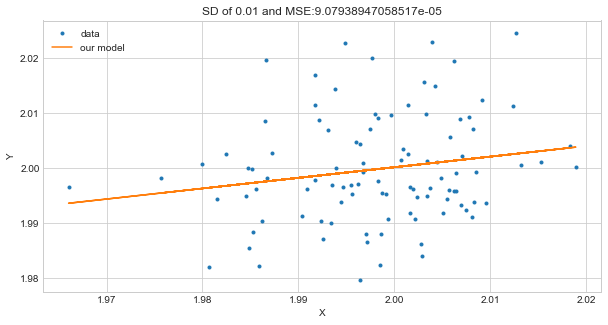

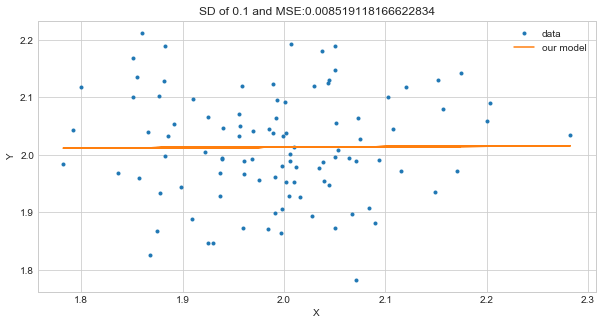

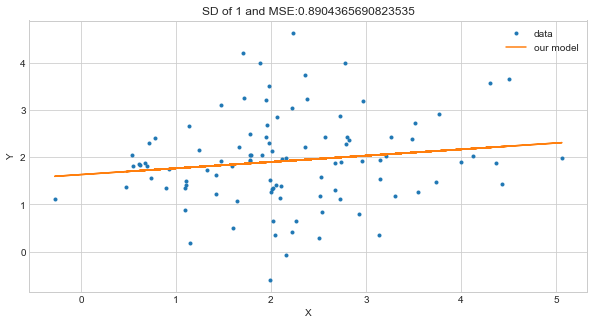

In [73]:
calculate_grad(dataset_1['A'], dataset_1['B'],"SD of 0.01",beta_zero=True, beta_one=True)
calculate_grad(dataset_2['A'], dataset_2['B'],"SD of 0.1",beta_zero=True, beta_one=True)
calculate_grad(dataset_3['A'], dataset_3['B'],"SD of 1",beta_zero=True, beta_one=True)

### Effect of SD: a normal distribution with high standard deviation results in values that are more spread out.This implies that there would be significant number of points that have large distance from the predicted line in general and thus as the SD value increase the MSE value increases as well.
### Also,since the data now has more spread the length of the line of fit increases as we increase the SD ###
### In general as we increase the variance, we observe an increase in the values of the Error since the points are more spread out and far from the line of fit

## Put ${\beta_0}$  to zero and rerun the program to generate the predicted line. Comment on the change you see for the varying values of  SD

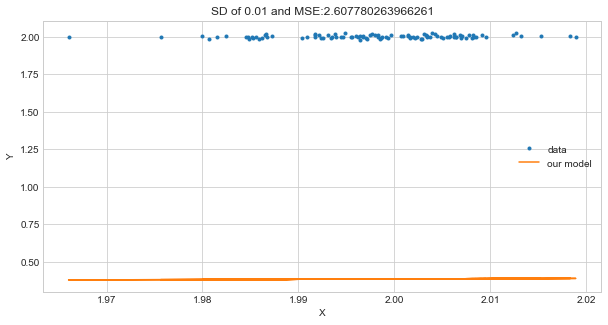

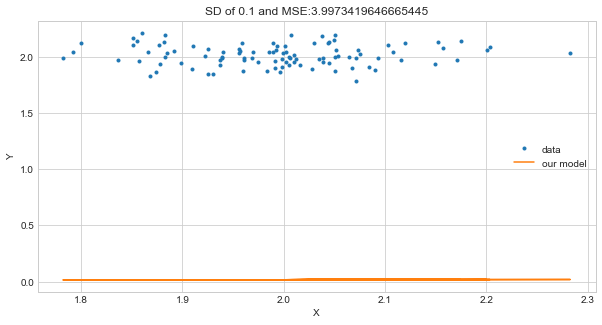

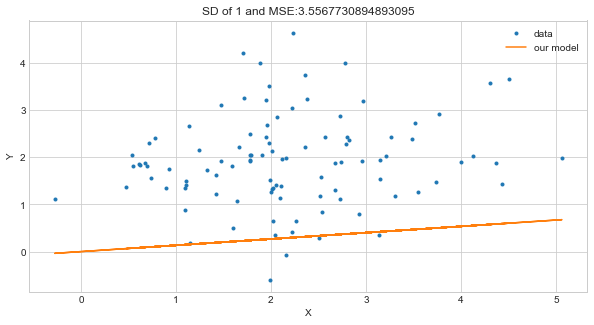

In [74]:
#performing lin reg setting beta_0 = 0
calculate_grad(dataset_1['A'], dataset_1['B'],"SD of 0.01",beta_zero=False, beta_one=True)
calculate_grad(dataset_2['A'], dataset_2['B'],"SD of 0.1",beta_zero=False, beta_one=True)
calculate_grad(dataset_3['A'], dataset_3['B'],"SD of 1",beta_zero=False, beta_one=True)

### Effect of making beta_0 as zero results in eliminating the intercept term of the line we are trying to fit. This implies that all the line would be originating from or near the  origin. This causes an increase in the MSE since the line is located far from the actual data points. As the SD increases the values are more spread out causing an increase in the MSE value.

## Put ${\beta_1}$  to zero and rerun the program to generate the predicted line. Comment on the change you see for the varying values of SD

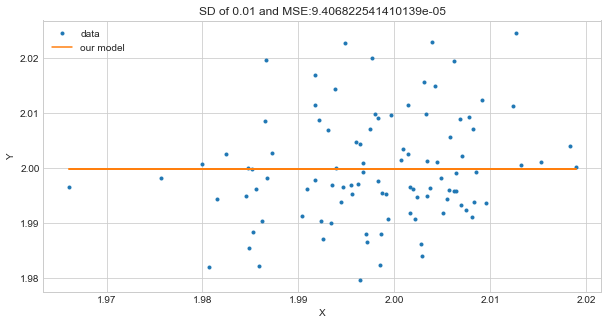

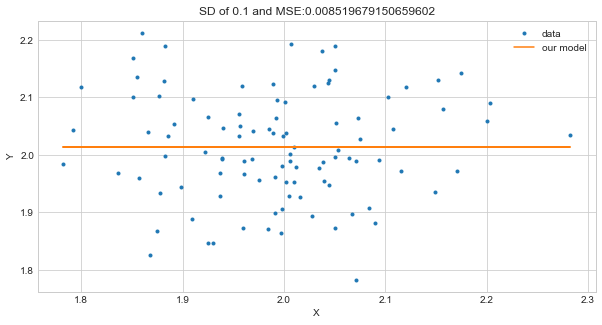

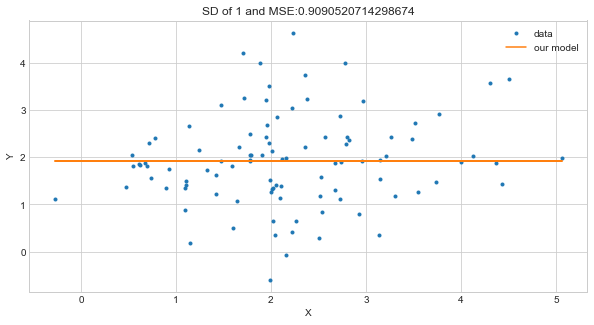

In [75]:
#performing lin reg setting beta_1 =0
calculate_grad(dataset_1['A'], dataset_1['B'],"SD of 0.01",beta_zero=True, beta_one=False)
calculate_grad(dataset_2['A'], dataset_2['B'],"SD of 0.1",beta_zero=True, beta_one=False)
calculate_grad(dataset_3['A'], dataset_3['B'],"SD of 1",beta_zero=True, beta_one=False)

### Effect of making beta_1 zero results in making the line completely horizontal. Since beta_one represents the slope of the line we are trying to fit, and making it zero results in horizontal line. The MSE does increase in this case but the effect is relatively less as when the beta_0 is made zero. Since the bias (beta_zero) is located near the mean value(2), the predicted line passes through the mean of the distribution and hence does a better job of fitting the line compared to making beta_0 as 0.

## In the end use numpy.linalg lstsq to replace step 2 for learning values of ${\beta_0}$ and ${\beta_1}$

### With the dataset  SD =0.01

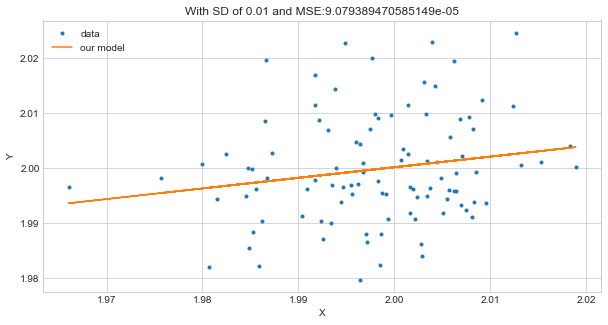

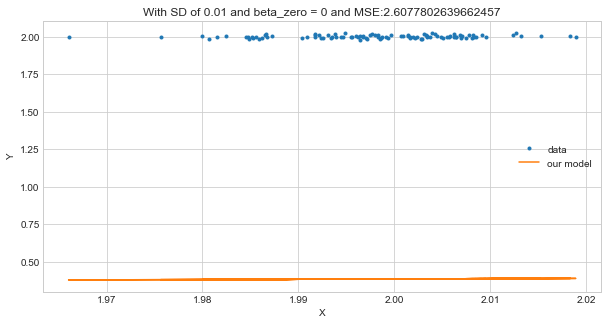

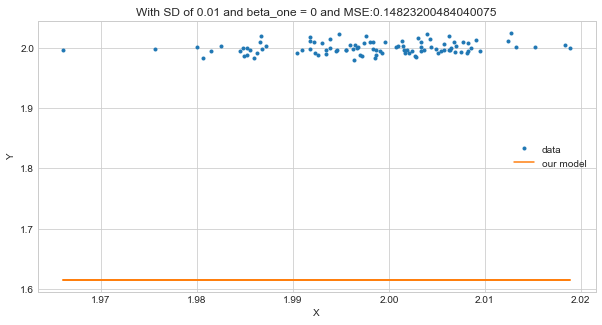

In [76]:
#performing the lin reg using numpy library functon np.linalg.lstsq
dataset_1['B_0']=1

mse_title ="and MSE val="
#lst square function returns m which is beta_one and c which is intercept i.e beta_zero
m, c = np.linalg.lstsq(dataset_1[['A','B_0']],dataset_1['B'],rcond=None)[0]
y_pred_new_SD1 = m*dataset_1['A']+c
mse_val1 = mse(y_orig=dataset_1['B'], y_pred=y_pred_new_SD1)
scatter_line_plot(dataset_1['A'],dataset_1['B'],y_pred_new_SD1,"With SD of 0.01 and MSE:"+str(mse_val1))

#making beta_zero = 0
beta_zero = 0
y_pred_new_SD1 = m*dataset_1['A']+beta_zero
mse_val1 = mse(y_orig=dataset_1['B'], y_pred=y_pred_new_SD1)
scatter_line_plot(dataset_1['A'],dataset_1['B'],y_pred_new_SD1,"With SD of 0.01 and beta_zero = 0 and MSE:"+str(mse_val1))

#making beta_one = 0
beta_one = 0
y_pred_new_SD1 = beta_one*dataset_1['A']+c
mse_val1 = mse(y_orig=dataset_1['B'], y_pred=y_pred_new_SD1)
scatter_line_plot(dataset_1['A'],dataset_1['B'],y_pred_new_SD1,"With SD of 0.01 and beta_one = 0 and MSE:"+str(mse_val1))


### With the dataset with SD= 0.1

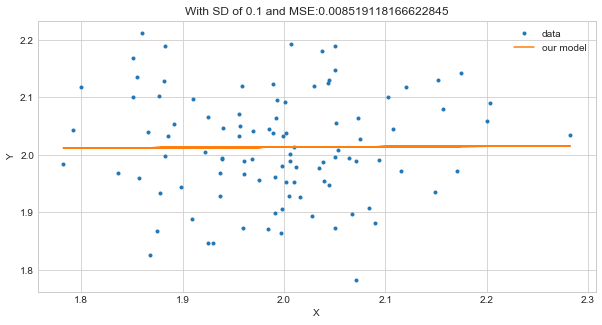

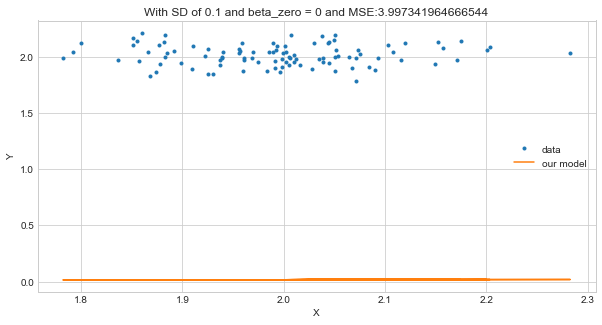

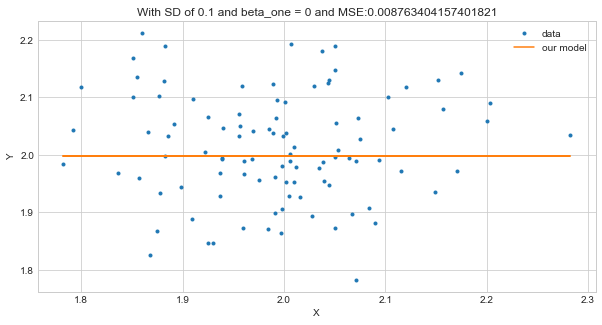

In [77]:
#Calculating the beta_zero=0
dataset_2['B_0']=1
m, c = np.linalg.lstsq(dataset_2[['A','B_0']],dataset_2['B'],rcond=None)[0]
y_pred_new_SD2 = m*dataset_2['A']+c
mse_val2 = mse(y_orig=dataset_2['B'], y_pred=y_pred_new_SD2)
scatter_line_plot(dataset_2['A'],dataset_2['B'],y_pred_new_SD2,"With SD of 0.1 and MSE:"+str(mse_val2))

#making beta_zero =0
beta_zero = 0
y_pred_new_SD2 = m*dataset_2['A']+beta_zero
mse_val2 = mse(y_orig=dataset_2['B'], y_pred=y_pred_new_SD2)
scatter_line_plot(dataset_2['A'],dataset_2['B'],y_pred_new_SD2,"With SD of 0.1 and beta_zero = 0 and MSE:"+str(mse_val2))
#making beta_one = 0
beta_one = 0
y_pred_new_SD2 = beta_one*dataset_2['A']+c
mse_val2 = mse(y_orig=dataset_2['B'], y_pred=y_pred_new_SD2)
scatter_line_plot(dataset_2['A'],dataset_2['B'],y_pred_new_SD2,"With SD of 0.1 and beta_one = 0 and MSE:"+str(mse_val2))

### With dataset having SD = 1

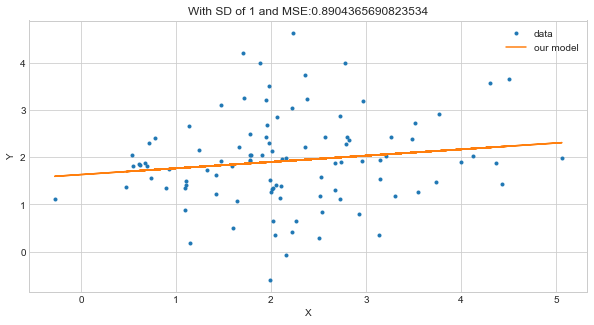

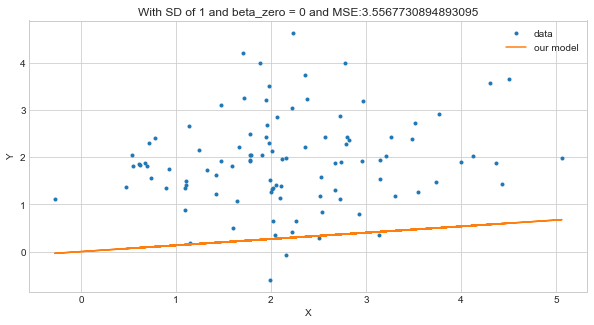

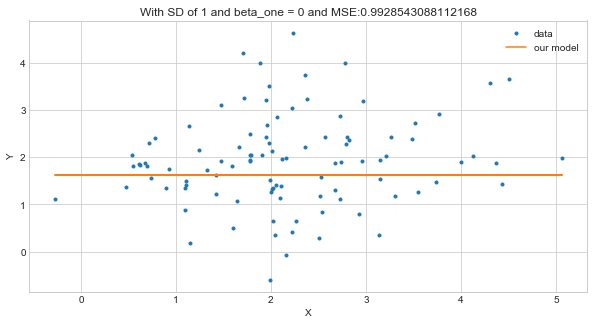

In [78]:
#Calculating the beta_one=0
dataset_3['B_0']=1
m, c = np.linalg.lstsq(dataset_3[['A','B_0']],dataset_3['B'],rcond=None)[0]
y_pred_new_SD3 = m*dataset_3['A']+c
mse_val3 = mse(y_orig=dataset_3['B'], y_pred=y_pred_new_SD3)
scatter_line_plot(dataset_3['A'],dataset_3['B'],y_pred_new_SD3,"With SD of 1 and MSE:"+str(mse_val3))

#making beta_zero =0
beta_zero = 0
y_pred_new_SD3 = m*dataset_3['A']+beta_zero
mse_val3 = mse(y_orig=dataset_3['B'], y_pred=y_pred_new_SD3)
scatter_line_plot(dataset_3['A'],dataset_3['B'],y_pred_new_SD3,"With SD of 1 and beta_zero = 0 and MSE:"+str(mse_val3))
#making beta_one = 0
beta_one = 0
y_pred_new_SD3 = beta_one*dataset_3['A']+c
mse_val3 = mse(y_orig=dataset_3['B'], y_pred=y_pred_new_SD3)
scatter_line_plot(dataset_3['A'],dataset_3['B'],y_pred_new_SD3,"With SD of 1 and beta_one = 0 and MSE:"+str(mse_val3))